# Objective
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not? using following models:

1. logistic regression <br>
2. svc   <br>
3. KNN   <br>

# Data
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Pregnancies: Number of times pregnant

* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 
* BloodPressure: Diastolic blood pressure (mm Hg)

* SkinThickness: Triceps skin fold thickness (mm)
 
* Insulin: 2-Hour serum insulin (mu U/ml)
 
* BMI: Body mass index (weight in kg/(height in m)^2)
 
* DiabetesPedigreeFunction: Diabetes pedigree function
 
* Age: Age (years)

* Outcome: Class variable (0 or 1)

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,QuantileTransformer, quantile_transform,RobustScaler
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score, recall_score, precision_score, f1_score, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
#for upsampling and downsampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
filepath="data/diabetes.csv"
df=pd.read_csv(filepath)

In [3]:
print("the data's shape is ",df.shape)

the data's shape is  (768, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
def data_down_upsampling(X,y):
    '''
     this function downsamples X and y
    '''
    near_miss = NearMiss() 
    x_DS, y_DS = near_miss.fit_sample(X,y)
    smote = SMOTE() 
    x_US, y_US = smote.fit_sample(X,y)
    return x_DS, y_DS,x_US, y_US

# showing correlation to output

In [9]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Outcome'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("yellow", as_cmap=True))

,Correlation to the target
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


# showing distribution of each class

In [10]:
# Total number of records
n_records = len(df)

# Number of records where output is zero
n_equ_0 = len(df[df["Outcome"]==0])

# Number of records where output is 1
n_equ_1 = len(df[df["Outcome"]==1])

# Percentage of individuals whose income is more than $50,000
greater_percent = round((n_equ_0/n_records)*100)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals with diabetes: {}".format(n_equ_1))
print("Individuals with no diabetes: {}".format(n_equ_0))
print("Percentage of individuals not infected with diabetes: {}%".format(greater_percent))

Total number of records: 768
Individuals with diabetes: 268
Individuals with no diabetes: 500
Percentage of individuals not infected with diabetes: 65%


# showing histogram for features

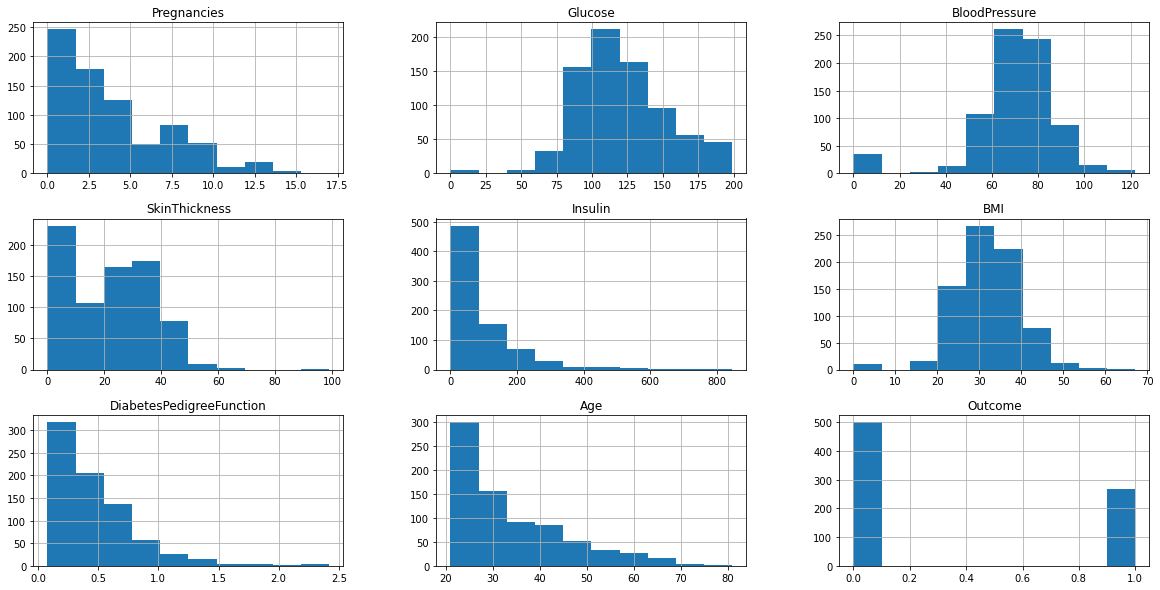

In [12]:
df.hist(figsize=(20,10))
plt.show()

Text(0.5, 1.0, 'Histogram of BloodPressure')

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NourhanElaraby\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


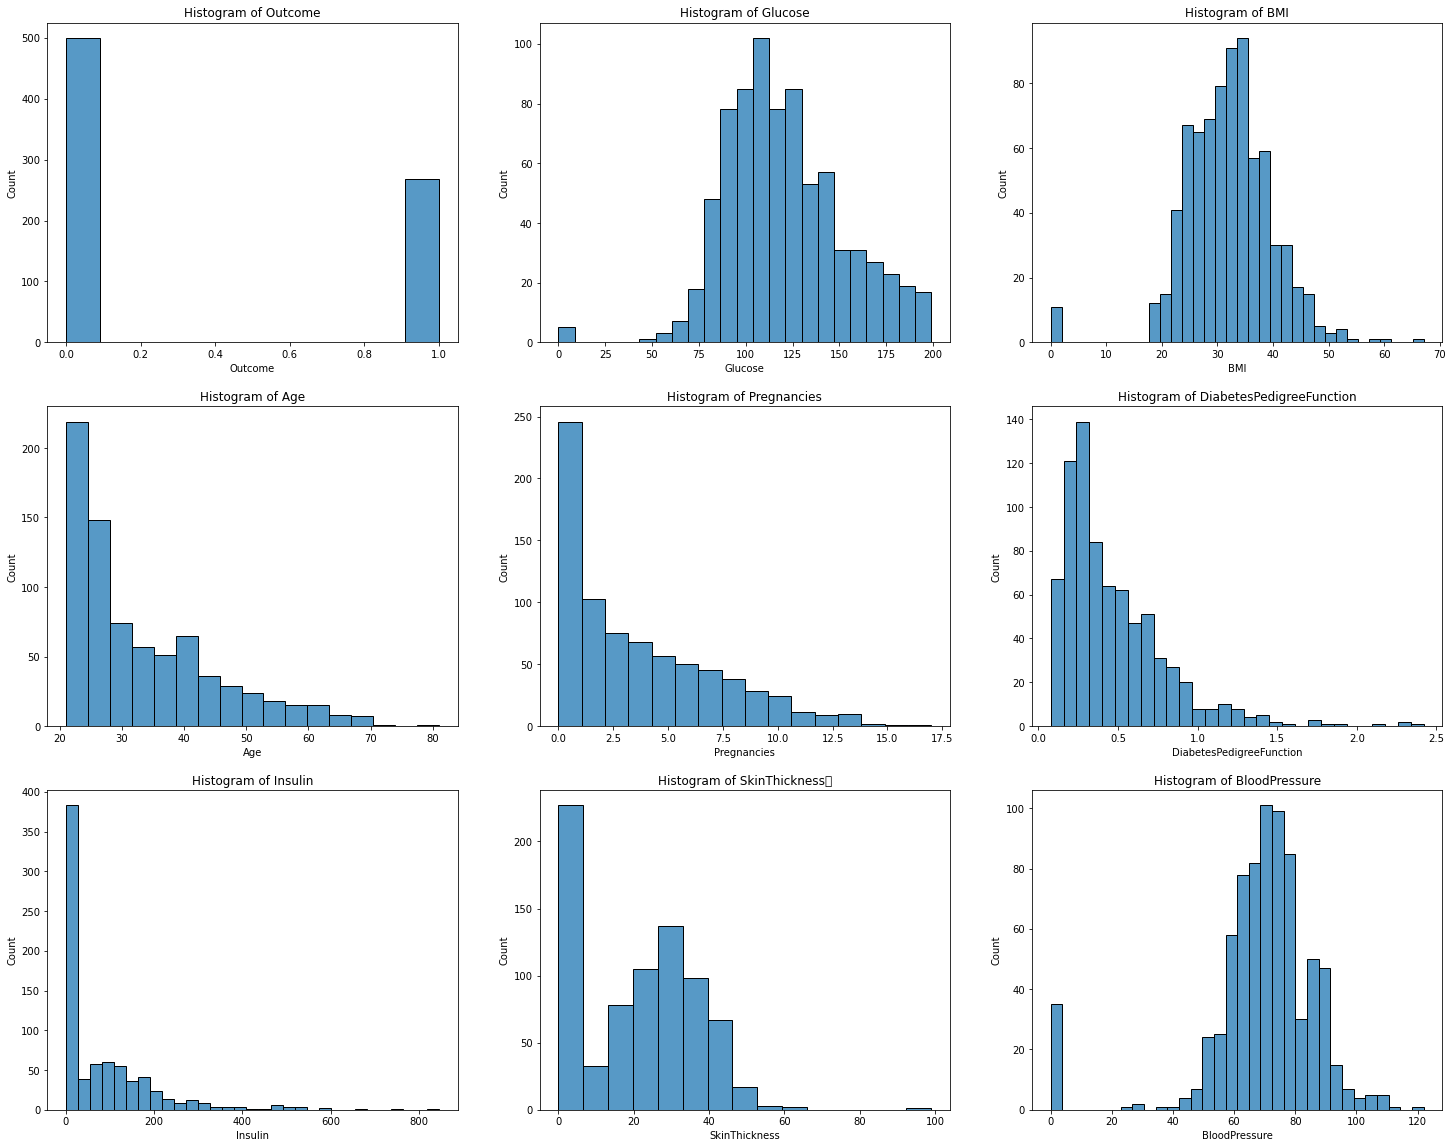

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(25, 20))
sns.histplot(df["Outcome"],ax=ax[0][0])
ax[0][0].set_title("Histogram of Outcome")
sns.histplot(df["Glucose"],ax=ax[0][1])
ax[0][1].set_title("Histogram of Glucose")
sns.histplot(df["BMI"],ax=ax[0][2])
ax[0][2].set_title("Histogram of BMI")
sns.histplot(df["Age"],ax=ax[1][0])
ax[1][0].set_title("Histogram of Age")
sns.histplot(df["Pregnancies"],ax=ax[1][1])
ax[1][1].set_title("Histogram of Pregnancies")
sns.histplot(df["DiabetesPedigreeFunction"],ax=ax[1][2])
ax[1][2].set_title("Histogram of DiabetesPedigreeFunction")
sns.histplot(df["Insulin"],ax=ax[2][0])
ax[2][0].set_title("Histogram of Insulin")
sns.histplot(df["SkinThickness"],ax=ax[2][1])
ax[2][1].set_title("Histogram of SkinThickness	")
sns.histplot(df["BloodPressure"],ax=ax[2][2])
ax[2][2].set_title("Histogram of BloodPressure")

## Conclusion

The following data has values around zero which is illogical:

1)insulin    <br>
2)thickness  <br>
3)bloodpressure   <br>
4)bmi             <br>
5)glucose          <br>

I will  treat them as missing values (missing data imputation)

# Showing Diagnostic plot for numerical features

In [14]:
# function to create histogram, Q-Q plot and
# boxplot. 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [15]:
df_cols=list(df.columns)[:-1]
print(df_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


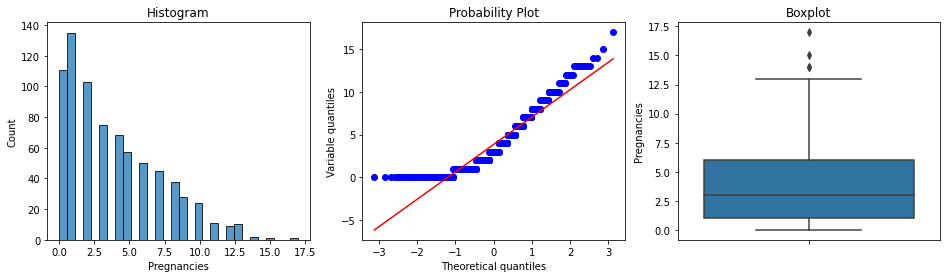

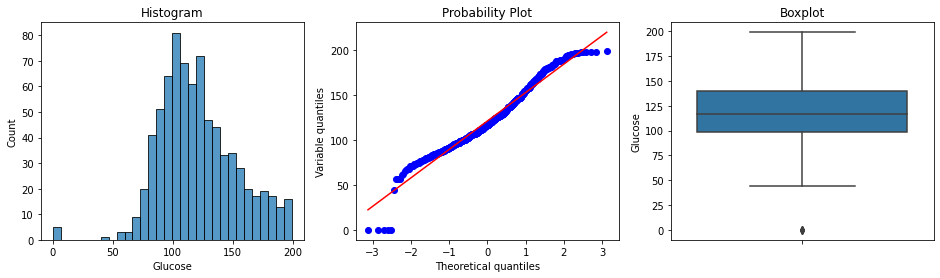

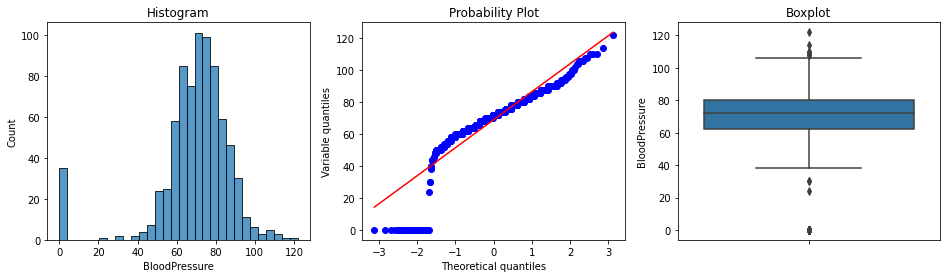

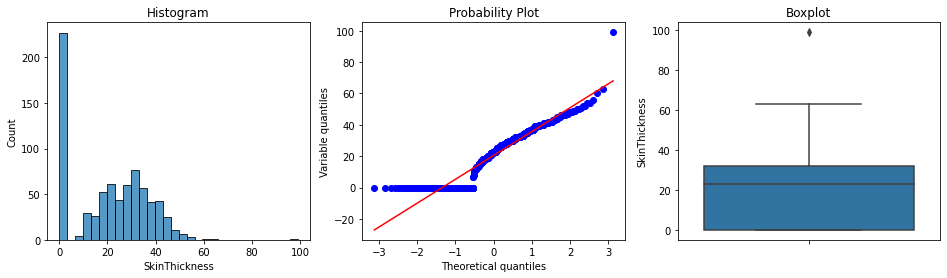

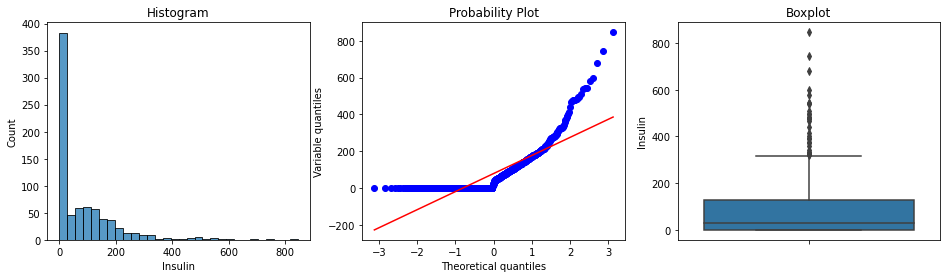

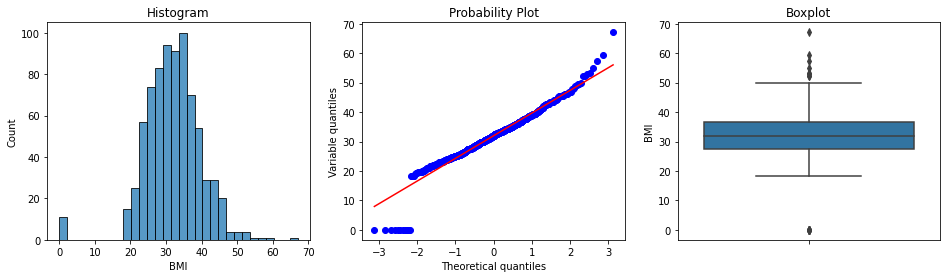

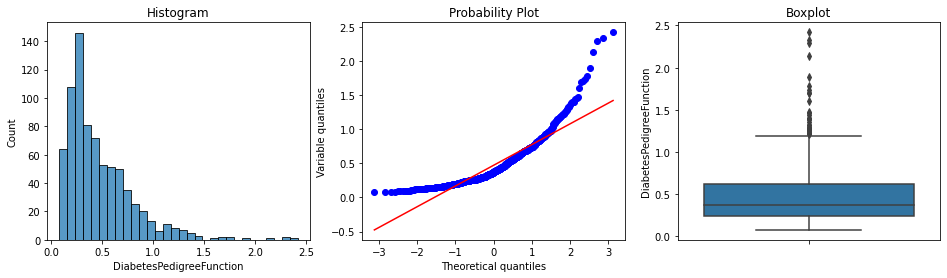

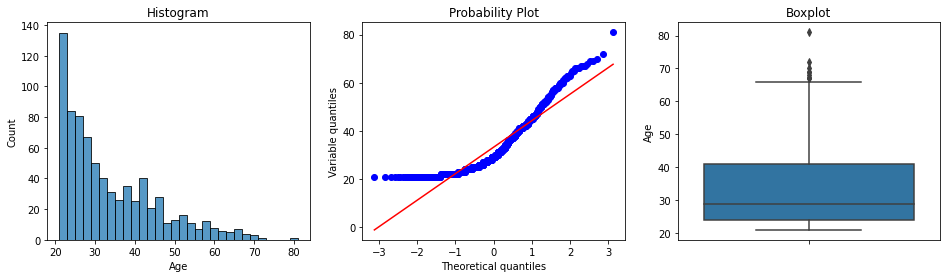

In [16]:
for i in df_cols:
    diagnostic_plots(df,i)

## Coclusion 

all data have outliers with different percentages except for glucose that is why i will use robust scaler

# Data Preprocessing

## Missing Data Imputation

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
#replacing zeros with np.nans
df_nulls=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[df_nulls]=df[df_nulls].apply(lambda x: x.replace(0,np.nan), axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [20]:
df.isnull().mean().sort_values(ascending=False)

Insulin                     0.486979
SkinThickness               0.295573
BloodPressure               0.045573
BMI                         0.014323
Glucose                     0.006510
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [21]:
# find variables with missing data
for var in df.columns:
    if df[var].isnull().sum() > 1:
        print(var, df[var].isnull().sum())

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


## conclusion about missing data

**missing cols**

1) Insulin            (more than 5% missing)   :knn imputation <br>
2) Skin Thickness     (more than 5% missing)   :knn imputation<br>
3) Blood Pressure     (less than 5% missing)   :median/mean imputation  <br>
4)BMI                 (less than 5% missing)   :median/mean imputation  <br>
5)Glucose             (less than 5% missing)    :median/mean imputation <br>

In [22]:
cols_use=list(df.columns)[:-1]
print(cols_use)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [23]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome",axis=1), 
                                                    df["Outcome"], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


In [24]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [25]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Feature Engineering

## Knn Imputation for Insulin and skin Thickness

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [27]:
from feature_engine.wrappers import SklearnTransformerWrapper
num_feat_knn=['Insulin','SkinThickness']
imputer = SklearnTransformerWrapper(
    transformer = KNNImputer(n_neighbors=5,weights='distance'),
    variables = num_feat_knn,
)

In [28]:
imputer.fit(X_train)

# transform the data
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# feature-engine returns a dataframe
train_t.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.0,29.0000,126.0,35.2,0.692,54
118,4,97.0,60.0,23.0000,84.2,28.2,0.443,22
247,0,165.0,90.0,33.0000,680.0,52.3,0.427,23
157,1,109.0,56.0,21.0000,135.0,25.2,0.833,23
468,8,120.0,NaN,29.3125,157.6,30.0,0.183,38


In [29]:
train_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 603 to 684
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   610 non-null    float64
 2   BloodPressure             585 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       606 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 43.2 KB


In [30]:
test_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 661 to 380
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    int64  
 1   Glucose                   153 non-null    float64
 2   BloodPressure             148 non-null    float64
 3   SkinThickness             154 non-null    float64
 4   Insulin                   154 non-null    float64
 5   BMI                       151 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 10.8 KB


In [31]:
cols_to_use=list(train_t.columns)

In [32]:
imputer = SimpleImputer(strategy='median')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(train_t)

SimpleImputer(strategy='median')

In [33]:
X_train = imputer.transform(train_t)
X_test = imputer.transform(test_t)

In [34]:
X_train

array([[7.00e+00, 1.50e+02, 7.80e+01, ..., 3.52e+01, 6.92e-01, 5.40e+01],
       [4.00e+00, 9.70e+01, 6.00e+01, ..., 2.82e+01, 4.43e-01, 2.20e+01],
       [0.00e+00, 1.65e+02, 9.00e+01, ..., 5.23e+01, 4.27e-01, 2.30e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 3.24e+01, 6.40e-01, 6.90e+01]])

In [35]:
pd.DataFrame(X_train, columns=cols_to_use).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,150.0,78.0,29.0000,126.0,35.2,0.692,54.0
1,4.0,97.0,60.0,23.0000,84.2,28.2,0.443,22.0
2,0.0,165.0,90.0,33.0000,680.0,52.3,0.427,23.0
3,1.0,109.0,56.0,21.0000,135.0,25.2,0.833,23.0
4,8.0,120.0,72.0,29.3125,157.6,30.0,0.183,38.0


In [36]:
pd.DataFrame(X_test, columns=cols_to_use).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,199.0,76.0,43.0000,218.333333,42.9,1.394,22.0
1,2.0,107.0,74.0,30.0000,100.000000,33.6,0.404,23.0
2,4.0,76.0,62.0,29.3125,157.600000,34.0,0.391,25.0
3,5.0,166.0,72.0,19.0000,175.000000,25.8,0.587,51.0
4,0.0,111.0,65.0,29.3125,157.600000,24.6,0.660,31.0


In [37]:
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_test = pd.DataFrame(X_test, columns=cols_to_use)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    float64
dtypes: float64(8)
memory usage: 38.5 KB


In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    float64
 1   Glucose                   154 non-null    float64
 2   BloodPressure             154 non-null    float64
 3   SkinThickness             154 non-null    float64
 4   Insulin                   154 non-null    float64
 5   BMI                       154 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    float64
dtypes: float64(8)
memory usage: 9.8 KB


In [40]:
transformer = RobustScaler().fit(X_train)
X_train=transformer.transform(X_train)
X_test=transformer.transform(X_test)

In [41]:
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

# train_predict function

In [42]:
X_train

array([[ 0.8       ,  0.76190476,  0.375     , ...,  0.30517711,
         0.87652646,  1.47058824],
       [ 0.2       , -0.5       , -0.75      , ..., -0.45776567,
         0.20081411, -0.41176471],
       [-0.6       ,  1.11904762,  1.125     , ...,  2.16893733,
         0.15739484, -0.35294118],
       ...,
       [ 0.2       , -0.57142857, -0.4375    , ..., -0.83923706,
        -0.59972863, -0.47058824],
       [ 1.6       , -0.78571429,  0.125     , ..., -0.2506812 ,
        -0.18724559,  0.35294118],
       [ 0.4       ,  0.42857143,  0.625     , ...,  0.        ,
         0.73541384,  2.35294118]])

In [43]:
#X_train, X_test, y_train, y_test


In [44]:
def train_predict(classifier,X_train,X_test,y_test,y_train): 
    '''
    inputs:
       - classifier: the learning algorithm to be trained and predicted on
    '''
    
    results = {}
    
    # Fit the classifier to the training data and Calculate the time
    start_train = time()
    #classifier = classifier.fit(X_train_scaled, y_train_scaled)
    classifier = classifier.fit(X_train, y_train)
    end_train = time()
    results['train_time'] = round((end_train-start_train), 2)

    # Predict the training/testing labels and Calculate the time
    start_test = time()
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    end_test = time()   
    results['pred_time'] = round((end_test-start_test), 2)
            
    # Model evaluation (training/testing data) using accuracy
    results['acc_train'] = round(accuracy_score(y_train, y_pred_train), 2)
    results['acc_test'] = round(accuracy_score(y_test, y_pred_test), 2)
    
    #Model Evaluation using r2_score
    results["r2_score_train"]=round(r2_score(y_train, y_pred_train),2)
    results["r2_score_test"]=round(r2_score(y_test, y_pred_test),2)
    
    #Model Evaluation using mean square error
    results["r2_score_train"]=round(mean_squared_error(y_train, y_pred_train),2)
    results["r2_score_test"]=round(mean_squared_error(y_test, y_pred_test),2)
    
    
    # Model evaluation (training/testing data) using f1-score
    results['f1_train'] = round(f1_score(y_train, y_pred_train), 2)
    results['f1_test'] = round(f1_score(y_test, y_pred_test), 2)
    
    # Display classification_report
    report = classification_report(y_test, y_pred_test)
       
    
    # Return the results
    return results, report

In [45]:
clf_LR = LogisticRegression(random_state=0,class_weight="balanced")
clf_SVM = SVC(random_state=0)
clf_DT = DecisionTreeClassifier(random_state=0)


In [46]:
clf_list = [clf_LR, clf_SVM,clf_DT]

# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}

for clf in clf_list:
    clf_evaluation[clf.__class__.__name__] = train_predict(clf,X_train, X_test, y_test,y_train )[0]
    clf_report[clf.__class__.__name__] = train_predict(clf,X_train, X_test, y_test, y_train)[1]

In [51]:
clf_knn1=KNeighborsClassifier(metric="euclidean")
clf_evaluation["KNN with euclidean"] = train_predict(clf,X_train, X_test, y_test,y_train )[0]
clf_report["KNN with euclidean"] = train_predict(clf,X_train, X_test, y_test, y_train)[1]

In [52]:
# evaluation for knn with manhattan
clf_knn2=KNeighborsClassifier(metric="manhattan")
clf_evaluation["KNN with manhattan"] = train_predict(clf,X_train, X_test, y_test,y_train )[0]
clf_report["KNN with manhattan"] = train_predict(clf,X_train, X_test, y_test, y_train)[1]

In [53]:
# evaluating for knn with minkowski
clf_knn3=KNeighborsClassifier(metric="minkowski")

In [54]:
clf_evaluation["knn with minkowski"] = train_predict(clf,X_train, X_test, y_test,y_train )[0]
clf_report["knn with minkowski"] = train_predict(clf,X_train, X_test, y_test, y_train)[1]

In [58]:
for key in clf_report:
    print(key)
    print(clf_report[key])
    print('---------------------------------------------------------')

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       107
           1       0.58      0.70      0.63        47

    accuracy                           0.75       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.77      0.75      0.76       154

---------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

---------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy        

In [55]:
for key in clf_evaluation:
    print(key)
    print(clf_evaluation[key])
    print('---------------------------------------------------------')

LogisticRegression
{'train_time': 0.03, 'pred_time': 0.0, 'acc_train': 0.76, 'acc_test': 0.75, 'r2_score_train': 0.24, 'r2_score_test': 0.25, 'f1_train': 0.69, 'f1_test': 0.63}
---------------------------------------------------------
SVC
{'train_time': 0.04, 'pred_time': 0.08, 'acc_train': 0.81, 'acc_test': 0.79, 'r2_score_train': 0.19, 'r2_score_test': 0.21, 'f1_train': 0.72, 'f1_test': 0.62}
---------------------------------------------------------
DecisionTreeClassifier
{'train_time': 0.02, 'pred_time': 0.0, 'acc_train': 1.0, 'acc_test': 0.8, 'r2_score_train': 0.0, 'r2_score_test': 0.2, 'f1_train': 1.0, 'f1_test': 0.67}
---------------------------------------------------------
KNN with euclidean
{'train_time': 0.01, 'pred_time': 0.0, 'acc_train': 1.0, 'acc_test': 0.8, 'r2_score_train': 0.0, 'r2_score_test': 0.2, 'f1_train': 1.0, 'f1_test': 0.67}
---------------------------------------------------------
KNN with manhattan
{'train_time': 0.01, 'pred_time': 0.0, 'acc_train': 1.0, 'acc

In [59]:
results = pd.DataFrame.from_dict(clf_evaluation)
results

,LogisticRegression,SVC,DecisionTreeClassifier,KNN with euclidean,KNN with manhattan,knn with minkowski
train_time,0.03,0.04,0.02,0.01,0.01,0.01
pred_time,0.00,0.08,0.00,0.00,0.00,0.00
acc_train,0.76,0.81,1.00,1.00,1.00,1.00
acc_test,0.75,0.79,0.80,0.80,0.80,0.80
r2_score_train,0.24,0.19,0.00,0.00,0.00,0.00
r2_score_test,0.25,0.21,0.20,0.20,0.20,0.20
f1_train,0.69,0.72,1.00,1.00,1.00,1.00
f1_test,0.63,0.62,0.67,0.67,0.67,0.67
